### ESPITA 2024-2025
### 4è Génie bio
### Dr Nabil Besbes

# TD 04 : traitement de signal Neuro avec python

What you can do with MNE Python
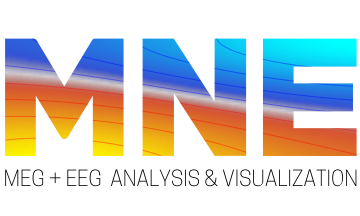

**Raw data visualization** to visualize recordings, can also use mne_browse_raw for extended functionality (see Browsing raw data with mne_browse_raw)

**Epoching:** Define epochs, baseline correction, handle conditions etc.
**Averaging** to get Evoked data
**Compute SSP projectors** to remove ECG and EOG artifacts
**Compute ICA** to remove artifacts or select latent sources.
**Maxwell filtering** to remove environmental noise.
**Boundary Element Modeling:** single and three-layer BEM model creation and solution computation.
**Forward modeling:** BEM computation and mesh creation (see The forward solution)
**Linear inverse solvers** (dSPM, sLORETA, MNE, LCMV, DICS)
**Sparse inverse solvers** (L1/L2 mixed norm MxNE, Gamma Map, Time-Frequency MxNE)
**Connectivity estimation** in sensor and source space
**Visualization** of sensor and source space data
**Time-frequency analysis** with Morlet wavelets (induced power, intertrial coherence, phase lock value) also in the source space
**Spectrum estimation** using multi-taper method
**Mixed Source Models** combining cortical and subcortical structures
**Dipole Fitting**
**Decoding** multivariate pattern analyis of M/EEG topographies
**Compute contrasts** between conditions, between sensors, across subjects etc.
**Non-parametric statistics** in time, space and frequency (including cluster-level)
**Scripting** (batch and parallel computing)

In [ ]:
# Execute this Cell only when mne is not installed (delete # to uncomment the next line)
!pip install mne #--upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.7 MB/s eta 0:00:00


In [ ]:
!pip install plotly==3.10.0
from chart_studio import plotly

In [ ]:
import mne  # If this line returns an error, uncomment and Execute the First code cell
mne.set_log_level('WARNING')
# We set the log-level to 'WARNING' so the output is less verbose

In [ ]:
# pour afficher les graphiques générés par Matplotlib directement dans le notebook.
# sans avoir besoin de les enregistrer ou de les ouvrir dans une fenêtre séparée.

%matplotlib inline
import numpy as np

In [ ]:
import os.path as op

In [ ]:
# be patient as it is approximately 2GB large)
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = str(data_path) + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
raw_fname0 = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')

In [ ]:
raw = mne.io.Raw(raw_fname, preload=False)
# If preload is False, only the header information is loaded into memory and the data is loaded on-demand, thus saving RAM.

print(raw)

In [ ]:
print(raw.info)

In [ ]:
# Look at the channels in raw
print(raw.ch_names[303:320])

In [ ]:
data, times = raw[:, :10]
print(data.shape)

In [ ]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

In [ ]:
# MNE-Python provides a set of helper functions to select the channels by type (see here for a brief overview of channel types in an MEG system).
# For example, to select only the magnetometer channels, we do this:

picks = mne.pick_types(raw.info, meg='mag', exclude=[])
print(picks)

In [ ]:
from chart_studio import plotly


In [ ]:
picks = mne.pick_types(raw.info, meg='mag', exclude=[])
data, times = raw[picks[:10], start:stop]

import matplotlib.pyplot as plt
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')

update = dict(layout=dict(showlegend=True), data=[dict(name=raw.info['ch_names'][p]) for p in picks[:10]])
py.iplot_mpl(plt.gcf(), update=update)

In [ ]:
# to have better visualization we use the MNE-python's interactive data Browser

raw.plot();

In [ ]:
# Look at the channels in raw
print(raw.ch_names[303:320])

In [ ]:
order = list(range(303, 308)) + [312] + list(range(315, 321))

raw.plot(order=order);

In [ ]:
# and this visualization with plotly
from plotly import tools
from plotly.graph_objs import Layout, YAxis, Scatter, Annotation, Annotations, Data, Figure, Marker, Font


picks = mne.pick_types(raw.info, meg='grad', exclude=[])
start, stop = raw.time_as_index([0, 10])

n_channels = 20
data, times = raw[picks[:n_channels], start:stop]
ch_names = [raw.info['ch_names'][p] for p in picks[:n_channels]]

In [ ]:
# creating the plotly graph by creating a separate subplot for each channel

step = 1. / n_channels
kwargs = dict(domain=[1 - step, 1], showticklabels=False, zeroline=False, showgrid=False)

# create objects for layout and traces
layout = Layout(yaxis=YAxis(kwargs), showlegend=False)
traces = [Scatter(x=times, y=data.T[:, 0])]

# loop over the channels
for ii in range(1, n_channels):
        kwargs.update(domain=[1 - (ii + 1) * step, 1 - ii * step])
        layout.update({'yaxis%d' % (ii + 1): YAxis(kwargs), 'showlegend': False})
        traces.append(Scatter(x=times, y=data.T[:, ii], yaxis='y%d' % (ii + 1)))

# add channel names using Annotations
annotations = Annotations([Annotation(x=-0.06, y=0, xref='paper', yref='y%d' % (ii + 1),
                                      text=ch_name, font=Font(size=9), showarrow=False)
                          for ii, ch_name in enumerate(ch_names)])
layout.update(annotations=annotations)

# set the size of the figure and plot it
layout.update(autosize=False, width=1000, height=600)
fig = Figure(data=Data(traces), layout=layout)
py.iplot(fig, filename='shared xaxis')

In [ ]:
# to lok the Bads channels

raw.info['bads']

In [ ]:
# save the first 150s

picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, exclude=[])
raw.save('sample_audvis_meg_raw.fif', tmin=0., tmax=150., picks=picks, overwrite=True)

In [ ]:
raw_beta = mne.io.Raw(raw_fname, preload=True)  # reload data with preload for filtering

# keep beta band
raw_beta.filter(13.0, 30.0, method='iir', n_jobs=-1)

# save the result
raw_beta.save('sample_audvis_beta_raw.fif', overwrite=True)

# check if the info dictionary got updated
print(raw_beta.info['highpass'], raw_beta.info['lowpass'])

In [ ]:
# Define and read epochs
## First extract events. Events are typically extracted from the trigger channel, which in our case is STI 014

events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # events is a 2d array

## event_id = {'Auditory/Left': 1, 'Auditory/Right': 2, 'Visual/Left': 3, 'Visual/Right': 4, 'smiley': 5, 'button': 32}

In [ ]:
print("Nombre d'events : ", len(events) )
print("Nobre d'event : Auditory/Left : ", len(events[events[:, 2] == 1]))
print("Nobre d'event : Auditory/Right : ", len(events[events[:, 2] == 2]))
print("Nobre d'event : Smiley : ", len(events[events[:, 2] == 5]))


In [ ]:
raw = mne.io.Raw(raw_fname, preload=True)  # reload data with preload for filtering
raw.filter(1, 40, method='iir')

In [ ]:
d, t = raw[raw.ch_names.index('STI 014'), :]
plt.plot(d[0,:1000])
py.iplot_mpl(plt.gcf())

In [ ]:
event_ids = ['aud_l', 'aud_r', 'vis_l', 'vis_r', 'smiley', 'button']
fig = mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, show=False)

# convert plot to plotly
update = dict(layout=dict(showlegend=True), data=[dict(name=e) for e in event_ids])
py.iplot_mpl(plt.gcf(), update=update)

In [ ]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

In [ ]:
raw.info['bads']

In [ ]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude='bads')

In [ ]:
# Alternatively one can restrict to magnetometers or gradiometers with

mag_picks = mne.pick_types(raw.info, meg='mag', eog=True, exclude='bads')
grad_picks = mne.pick_types(raw.info, meg='grad', eog=True, exclude='bads')

In [ ]:
baseline = (None, 0)  # means from the first instant to t = 0

In [ ]:
# Define peak-to-peak rejection parameters for gradiometers, magnetometers and EOG.
# If the data in any channel exceeds these thresholds, the corresponding epoch will be rejected:

reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

In [ ]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=reject)

In [ ]:
from mne.fixes import Counter

# drop bad epochs
epochs.drop_bad_epochs()
drop_log = epochs.drop_log

# calculate percentage of epochs dropped for each channel
perc = 100 * np.mean([len(d) > 0 for d in drop_log if not any(r in ['IGNORED'] for r in d)])
scores = Counter([ch for d in drop_log for ch in d if ch not in ['IGNORED']])
ch_names = np.array(list(scores.keys()))
counts = 100 * np.array(list(scores.values()), dtype=float) / len(drop_log)
order = np.flipud(np.argsort(counts))

ImportError: cannot import name 'Counter' from 'mne.fixes' (/usr/local/lib/python3.10/dist-packages/mne/fixes.py)

In [ ]:
evoked = epochs.average()

In [ ]:
fig = evoked.plot(show=False)  # butterfly plots
update = dict(layout=dict(showlegend=False), data=[dict(name=raw.info['ch_names'][p]) for p in picks[:10]])
py.iplot_mpl(fig, update=update)

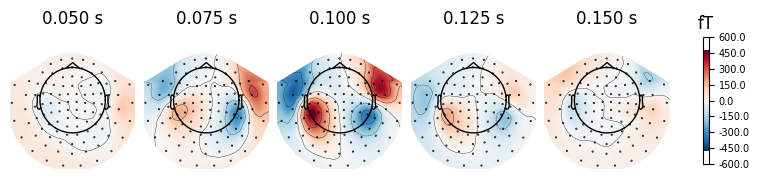

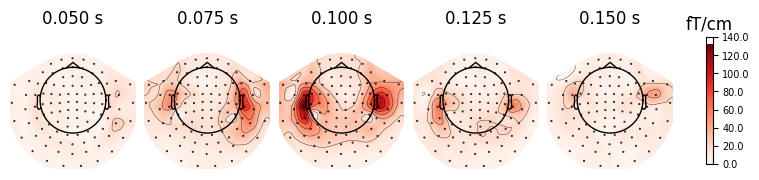

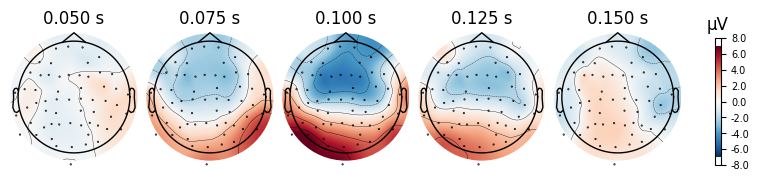

In [ ]:
# topography plots
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag');
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='grad');
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='eeg');

Ces visualisations sont cruciales pour interpréter les données EEG/MEG et peuvent aider à identifier des régions spécifiques du cerveau qui répondent à des stimuli ou à des tâches particulières. Elles permettent également d'explorer des phénomènes tels que la synchronisation cérébrale et l'activité régionale pendant différentes conditions expérimentales.